In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nhập hàm p(x), q(x), f(x)

In [2]:
# nhập hàm p(x)
def p(x):
    return 1+x**2
# nhập hàm q(x)
def q(x):
    return -(4*x**3 - 6*x**2 +2.25*x)
# nhập hàm f(x) (hoặc r(x))
def f(x):
    return 2*np.exp(-x**2)*(1.25*x**2-2.75*x-2)
# nhập a
a = 0
# nhập b
b = 3
# nhập n
n = 31
# nhập alpha (hoặc muy1)
alpha = 150
# nhập beta (hoặc muy2)
beta = 21.9787667
# nhập sigma1
sigma1 = 2
# nhập sigma2
sigma2 = 3

Bài toán điều kiện biên loại 1:
$$
\begin{cases}
u(a) &= \alpha\\
u(b) &= \beta
\end{cases}
$$
Là nghiệm của hệ phương trình:
$$
\begin{cases}
u_0 &= \alpha\\
A_iu_{i-1} + B_iu_i + C_iu_{i+1} &= -h^2f_i\\
y_n &= \beta
\end{cases}
$$
trong đó: 
$$A_i = p_{i - \frac{h}{2}},\quad B_i = p_{i + \frac{h}{2}} + p_{i - \frac{h}{2}} - h^2q_{i},\quad C_i = p_{i + \frac{h}{2}}$$

In [3]:
# giải bài toán điều kiện biên loại 1
def slove_DKBL1(a, b, n, alpha, beta):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    A = np.zeros((n, n))
    B = np.zeros(n)
    A[0][0] = 1
    A[n - 1][n - 1] = 1
    B[0] = alpha
    B[n - 1] = beta
    for i in range(1, n - 1):
        A[i][i - 1] = p(x[i] - h / 2)
        A[i][i] = -p(x[i] + h / 2) - p(x[i] - h / 2) + h**2 * q(x[i])
        A[i][i + 1] = p(x[i] + h / 2)
        B[i] = -h**2 * f(x[i])
    y = np.linalg.solve(A, B)
    return x, y

Bài toán điều kiện biên loại 2:
$$
\begin{cases}
p(a)u'(a) &= -\mu_1\\
p(b)u'(b) &= -\mu_2
\end{cases}
$$
Là nghiệm của hệ phương trình:
$$
\begin{cases}
\displaystyle -\left(p_{\frac{1}{2}} - \frac{h^2q{_0}}{2}\right)u_0 + p_{\frac{1}{2}}u_1 &= -\frac{h^2f{_0}}{2} - \mu_1h\\
A_iu_{i-1} + B_iu_i + C_iu_{i+1} &= -h^2f_i\\
\displaystyle -p_{n - \frac{1}{2}}u_{n-1} + \left(p_{n - \frac{1}{2}} - \frac{h^2q{_n}}{2}\right)u_n &= \frac{h^2f_n}{2} - \mu_2h
\end{cases}
$$
trong đó: 
$$A_i = p_{i - \frac{h}{2}},\quad B_i = p_{i + \frac{h}{2}} + p_{i - \frac{h}{2}} - h^2q_{i},\quad C_i = p_{i + \frac{h}{2}}$$

In [4]:
# giải bài toán điều kiện biên loại 2
def slove_DKBL2(a, b, n, muy1, muy2):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    A = np.zeros((n, n))
    B = np.zeros(n)
    A[0][0] = -p(x[0] + h / 2) + h**2 * q(x[0])/2
    A[0][1] = p(x[0] + h / 2)
    B[0] = -h**2 * f(x[0])/2 - muy1*h
    A[n - 1][n - 1] = p(x[n - 1] - h / 2) - h**2 * q(x[n - 1])/2
    A[n - 1][n - 2] = -p(x[n - 1] - h / 2)
    B[n - 1] = h**2 * f(x[n - 1])/2 - muy2*h
    for i in range(1, n - 1):
        A[i][i - 1] = p(x[i] - h / 2)
        A[i][i] = -p(x[i] + h / 2) - p(x[i] - h / 2) + h**2 * q(x[i])
        A[i][i + 1] = p(x[i] + h / 2)
        B[i] = -h**2 * f(x[i])
    y = np.linalg.solve(A, B)
    return x, y

Bài toán điều kiện biên loại 3:
$$
\begin{cases}
p(a)u'(a) - \sigma_1u(a) &= -\mu_1\\
p(b)u'(b) - \sigma_2u(b)&= -\mu_2
\end{cases}
$$
Là nghiệm của hệ phương trình:
$$
\begin{cases}
\displaystyle -\left(p_{\frac{1}{2}} - \frac{h^2q{_0}}{2} + \sigma_1\right)u_0 + p_{\frac{1}{2}}u_1 &= -\frac{h^2f{_0}}{2} - \mu_1h\\
A_iu_{i-1} + B_iu_i + C_iu_{i+1} &= -h^2f_i\\
\displaystyle -p_{n - \frac{1}{2}}u_{n-1} + \left(p_{n - \frac{1}{2}} - \frac{h^2q{_n}}{2} - \sigma_2\right)u_n &= \frac{h^2f_n}{2} - \mu_2h
\end{cases}
$$
trong đó: 
$$A_i = p_{i - \frac{h}{2}},\quad B_i = p_{i + \frac{h}{2}} + p_{i - \frac{h}{2}} - h^2q_{i},\quad C_i = p_{i + \frac{h}{2}}$$

In [5]:
# giải bài toán điều kiện biên loại 3
def slove_DKBL3(a, b, n, muy1, muy2, sigma1, sigma2):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    A = np.zeros((n, n))
    B = np.zeros(n)
    A[0][0] = -p(x[0] + h / 2) + h**2 * q(x[0])/2 - sigma1
    A[0][1] = p(x[0] + h / 2)
    B[0] = -h**2 * f(x[0])/2 - muy1*h
    A[n - 1][n - 1] = p(x[n - 1] - h / 2) - h**2 * q(x[n - 1])/2 - sigma2
    A[n - 1][n - 2] = -p(x[n - 1] - h / 2)
    B[n - 1] = h**2 * f(x[n - 1])/2 - muy2*h
    for i in range(1, n - 1):
        A[i][i - 1] = p(x[i] - h / 2)
        A[i][i] = -p(x[i] + h / 2) - p(x[i] - h / 2) + h**2 * q(x[i])
        A[i][i + 1] = p(x[i] + h / 2)
        B[i] = -h**2 * f(x[i])
    y = np.linalg.solve(A, B)
    return x, y

In [6]:
# phương pháp sai phân với bài toán trị riêng
def sai_phan_tri_rieng(a, b, n, alpha, beta):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    A = np.zeros((n - 2, n - 2))
    A[0][0] = -p(x[1] + h / 2) / (f(x[1])*h**2) - p(x[1] - h / 2) / (f(x[1])*h**2) - q(x[1]) / f(x[1])
    A[0][1] = p(x[1] + h / 2) / (f(x[1])*h**2)
    A[n - 3][n - 3] = -p(x[n - 2] + h / 2) / (f(x[n - 2])*h**2) - p(x[n - 2] - h / 2) / (f(x[n - 2])*h**2) + q(x[n - 2]) / f(x[n - 2])
    A[n - 3][n - 4] = p(x[n - 2] - h / 2) / (f(x[n - 2])*h**2)
    for i in range(1, n - 3):
        A[i][i - 1] = p(x[i] - h / 2) / (f(x[i])*h**2)
        A[i][i] = -p(x[i] + h / 2) / (f(x[i])*h**2) - p(x[i] - h / 2) / (f(x[i])*h**2) - q(x[i]) / f(x[i])
        A[i][i + 1] = p(x[i] + h / 2) / (f(x[i])*h**2)
    lamda, y = np.linalg.eig(A)
    location = np.where(lamda == np.max(lamda))
    return lamda[location[0][0]], x, np.concatenate(([alpha], y[:, location[0][0]]/y[location[0][0], 0], [beta]))

In [7]:
# hàm ghép trơn bậc 3
def ghep_tron_bac_3(x, y):
    S = list()
    h = list()
    m = list()
    lamda = list()
    muy = list()
    d = list()
    alpha = list()
    beta = list()
    phi = list()
    theta = list()

    lamda.append(1)
    muy.append(0)
    d.append(0)
    h.append(x[1] - x[0])

    alpha.append(0)
    beta.append(0)

    for i in range(0, len(x) - 2):
        h.append(x[i + 2] - x[i + 1])
        alpha.append(lamda[i] / (-2 - muy[i] * alpha[i]))
        beta.append((beta[i]*muy[i] - d[i])/(-2 - muy[i] * alpha[i]))
        lamda.append(h[i+1]/(h[i] + h[i+1]))
        muy.append(1 - lamda[i+1])
        d.append(6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i])/(h[i] + h[i+1]))

    alpha.append(lamda[-1]/(-2 - muy[-1]*alpha[-1]))
    beta.append((beta[-1]*muy[-1] - d[-1])/(-2 - muy[-1]*alpha[-2]))

    lamda.append(0)
    muy.append(1)
    d.append(0)

    m.append((muy[-1]*beta[-1] - d[-1])/(-2 - muy[-1]*alpha[-1]))

    for i in range(len(x) - 2, -1, -1):
        m.append(alpha[i+1]*m[-1] + beta[i+1])
        phi.append(y[i+1]/h[i] - m[-2]*h[i]/6)
        theta.append(y[i]/h[i] - m[-1]*h[i]/6)
        s = list()
        s.append((-m[-1] + m[-2])/(6*h[i]))
        s.append((m[-1]*x[i+1] - m[-2]*x[i])/(2*h[i]))
        s.append((-m[-1]*x[i+1]**2 + m[-2]*x[i]**2)/(2*h[i]) + phi[-1] - theta[-1])
        s.append((m[-1]*x[i+1]**3 - m[-2]*x[i]**3)/(6*h[i]) - phi[-1]*x[i] + theta[-1]*x[i+1])
        S.append(np.array(s))
    S.reverse()
    return S

def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

# vẽ đồ thị
def ve_do_thi(x, y, S):
    # plt.plot(x, y, 'ro')
    for i in range(len(S)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    plt.show()

def ve_do_thi_2(x, y, S1, S2):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    plt.legend([Y0[0], Y1[0]], ['y[0]: biến thứ nhất', 'y[1]: biến thứ hai'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

def ve_do_thi_3(x, y, S1, S2, S3):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    for i in range(len(S3)):
        x_2 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_2 = hoocne_quatient(S2[i], x_2)[1]
        Y2 = plt.plot(x_2, y_2, 'b')
    plt.legend([Y0[0], Y1[0], Y2[0]], ['y[0]', 'y[1]', 'y[2]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

    plt.plot(y[:, 0], y[:, 2], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[2]')
    plt.show()

    plt.plot(y[:, 1], y[:, 2], 'y')
    plt.xlabel('y[1]')
    plt.ylabel('y[2]')

Kết quả điều kiện biên loại 1

Bài toán điều kiện biên loại 1
10.245678316710324
[[0.00000000e+00 1.50000000e+02]
 [1.00000000e-01 1.35792898e+02]
 [2.00000000e-01 1.22131940e+02]
 [3.00000000e-01 1.09308664e+02]
 [4.00000000e-01 9.74516212e+01]
 [5.00000000e-01 8.65833462e+01]
 [6.00000000e-01 7.66692042e+01]
 [7.00000000e-01 6.76518985e+01]
 [8.00000000e-01 5.94715496e+01]
 [9.00000000e-01 5.20746372e+01]
 [1.00000000e+00 4.54159278e+01]
 [1.10000000e+00 3.94568775e+01]
 [1.20000000e+00 3.41628915e+01]
 [1.30000000e+00 2.95007904e+01]
 [1.40000000e+00 2.54370849e+01]
 [1.50000000e+00 2.19372013e+01]
 [1.60000000e+00 1.89655553e+01]
 [1.70000000e+00 1.64862776e+01]
 [1.80000000e+00 1.44643837e+01]
 [1.90000000e+00 1.28672125e+01]
 [2.00000000e+00 1.16660176e+01]
 [2.10000000e+00 1.08376523e+01]
 [2.20000000e+00 1.03663522e+01]
 [2.30000000e+00 1.02456783e+01]
 [2.40000000e+00 1.04807399e+01]
 [2.50000000e+00 1.10908825e+01]
 [2.60000000e+00 1.21130948e+01]
 [2.70000000e+00 1.36064820e+01]
 [2.80000000e+00 1.5658274

C:\Users\Admin\AppData\Local\Temp\ipykernel_5676\3247859234.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


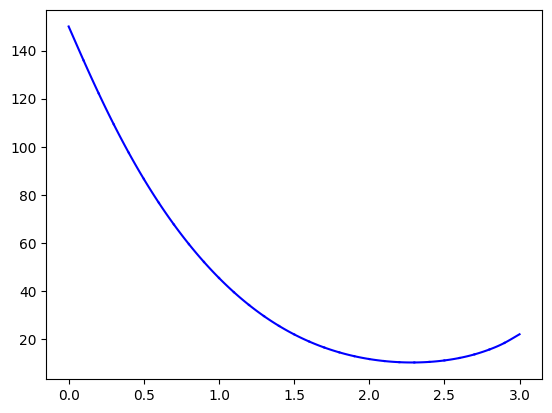

In [8]:
# giải bài toán điều kiện biên loại 1
print("Bài toán điều kiện biên loại 1")
x, y = slove_DKBL1(a, b, n, alpha, beta)
print(np.min(y))
print(np.concatenate((x, y)).reshape(2, n).T)
S = ghep_tron_bac_3(x, y)
ve_do_thi(x, y, S)

Kết quả điều kiện biên loại 2

In [9]:
# giải bài toán điều kiện biên loại 2
print("Bài toán điều kiện biên loại 2")
x, y = slove_DKBL2(a, b, n, alpha, beta)
print(np.concatenate((x, y)).reshape(2, n).T)

Bài toán điều kiện biên loại 2
[[0.00000000e+00 1.53935480e+02]
 [1.00000000e-01 1.38992836e+02]
 [2.00000000e-01 1.24616013e+02]
 [3.00000000e-01 1.11109479e+02]
 [4.00000000e-01 9.86095988e+01]
 [5.00000000e-01 8.71431404e+01]
 [6.00000000e-01 7.66772781e+01]
 [7.00000000e-01 6.71547974e+01]
 [8.00000000e-01 5.85145150e+01]
 [9.00000000e-01 5.07003470e+01]
 [1.00000000e+00 4.36632744e+01]
 [1.10000000e+00 3.73597687e+01]
 [1.20000000e+00 3.17490891e+01]
 [1.30000000e+00 2.67907994e+01]
 [1.40000000e+00 2.24430864e+01]
 [1.50000000e+00 1.86619943e+01]
 [1.60000000e+00 1.54014467e+01]
 [1.70000000e+00 1.26138301e+01]
 [1.80000000e+00 1.02509038e+01]
 [1.90000000e+00 8.26483266e+00]
 [2.00000000e+00 6.60918793e+00]
 [2.10000000e+00 5.23981367e+00]
 [2.20000000e+00 4.11549948e+00]
 [2.30000000e+00 3.19843713e+00]
 [2.40000000e+00 2.45446362e+00]
 [2.50000000e+00 1.85310976e+00]
 [2.60000000e+00 1.36748170e+00]
 [2.70000000e+00 9.74004994e-01]
 [2.80000000e+00 6.52058370e-01]
 [2.90000000

Kết quả điều kiện biên loại 3

In [10]:
# giải bài toán điều kiện biên loại 3
print("Bài toán điều kiện biên loại 3")
if sigma1 >= 0 and sigma2 >= 0 and sigma1 + sigma2 > 0:
    x, y = slove_DKBL3(a, b, n, alpha, beta, sigma1, sigma2)
    print(np.concatenate((x, y)).reshape(2, n).T)

Bài toán điều kiện biên loại 3
[[0.         7.04045994]
 [0.1        6.14362192]
 [0.2        5.31829416]
 [0.3        4.58136437]
 [0.4        3.93791278]
 [0.5        3.38478865]
 [0.6        2.91400229]
 [0.7        2.51542628]
 [0.8        2.17865072]
 [0.9        1.89407503]
 [1.         1.65342272]
 [1.1        1.44987652]
 [1.2        1.27799592]
 [1.3        1.13353324]
 [1.4        1.01322245]
 [1.5        0.91458395]
 [1.6        0.83576659]
 [1.7        0.77543544]
 [1.8        0.73270555]
 [1.9        0.707119  ]
 [2.         0.69866165]
 [2.1        0.70781726]
 [2.2        0.7356593 ]
 [2.3        0.78398421]
 [2.4        0.8554946 ]
 [2.5        0.95404609]
 [2.6        1.08497904]
 [2.7        1.25556528]
 [2.8        1.47561262]
 [2.9        1.75828688]
 [3.         2.12123504]]


Kết quả bài toán trị riêng

In [11]:
# phương pháp sai phân với bài toán trị riêng
print("Phương pháp sai phân với bài toán trị riêng")
lamda, x, y = sai_phan_tri_rieng(a, b, n, alpha, beta)
print("Trị riêng trội là: ", lamda)
print("bảng giá trị của hàm số tương ứng là: ")
print(np.concatenate((x, y)).reshape(2, n).T)

Phương pháp sai phân với bài toán trị riêng
Trị riêng trội là:  3498829.736657638
bảng giá trị của hàm số tương ứng là: 
[[ 0.00000000e+00  1.50000000e+02]
 [ 1.00000000e-01  1.00000000e+00]
 [ 2.00000000e-01  5.37749300e+00]
 [ 3.00000000e-01 -7.71723710e-01]
 [ 4.00000000e-01  4.66899419e+00]
 [ 5.00000000e-01 -1.00445914e+00]
 [ 6.00000000e-01 -7.37328728e-01]
 [ 7.00000000e-01  3.34100484e+00]
 [ 8.00000000e-01 -9.41413741e+00]
 [ 9.00000000e-01 -3.57211258e+00]
 [ 1.00000000e+00 -3.05267258e+00]
 [ 1.10000000e+00 -9.40911826e-01]
 [ 1.20000000e+00 -8.55205777e-01]
 [ 1.30000000e+00  2.67122583e+00]
 [ 1.40000000e+00  3.09910622e+00]
 [ 1.50000000e+00 -2.09729845e-02]
 [ 1.60000000e+00 -7.38211495e+00]
 [ 1.70000000e+00 -3.61920320e+00]
 [ 1.80000000e+00  3.57046655e+00]
 [ 1.90000000e+00  2.97676208e+00]
 [ 2.00000000e+00  6.21990781e+00]
 [ 2.10000000e+00  1.17614686e+03]
 [ 2.20000000e+00 -7.23592439e+05]
 [ 2.30000000e+00  2.46292096e+08]
 [ 2.40000000e+00 -4.44890233e+10]
 [ 2

Thuật toán:\
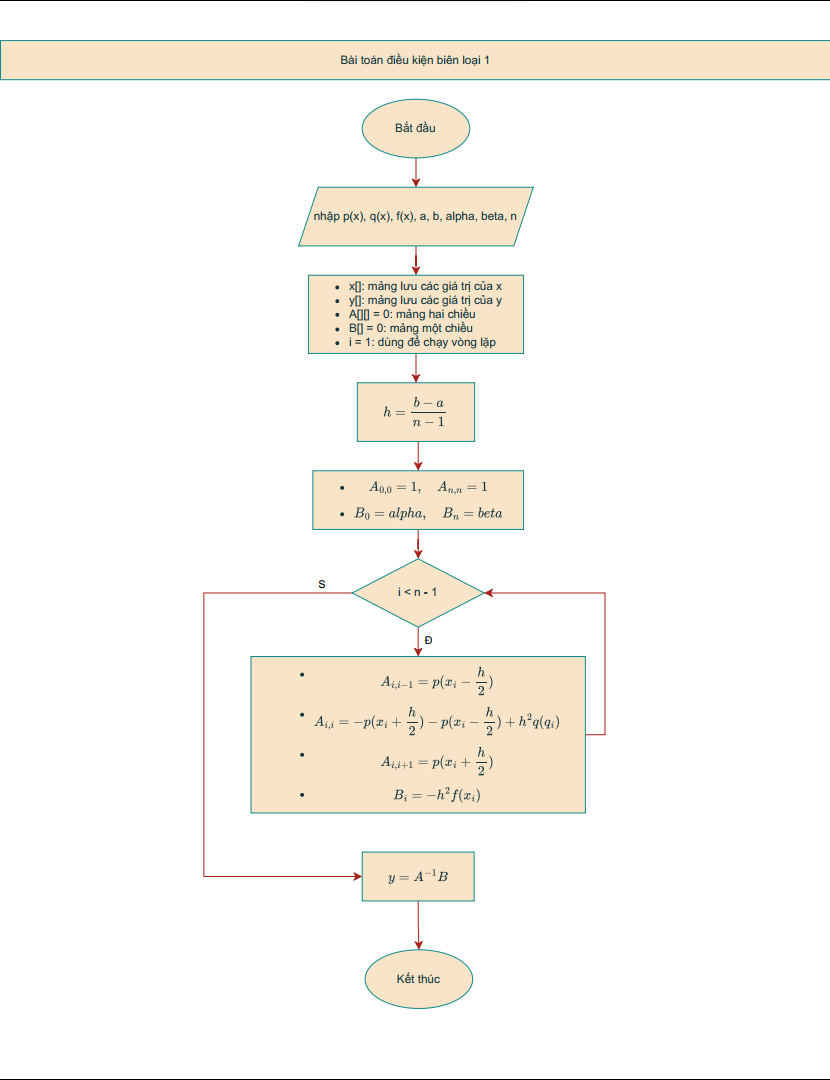\
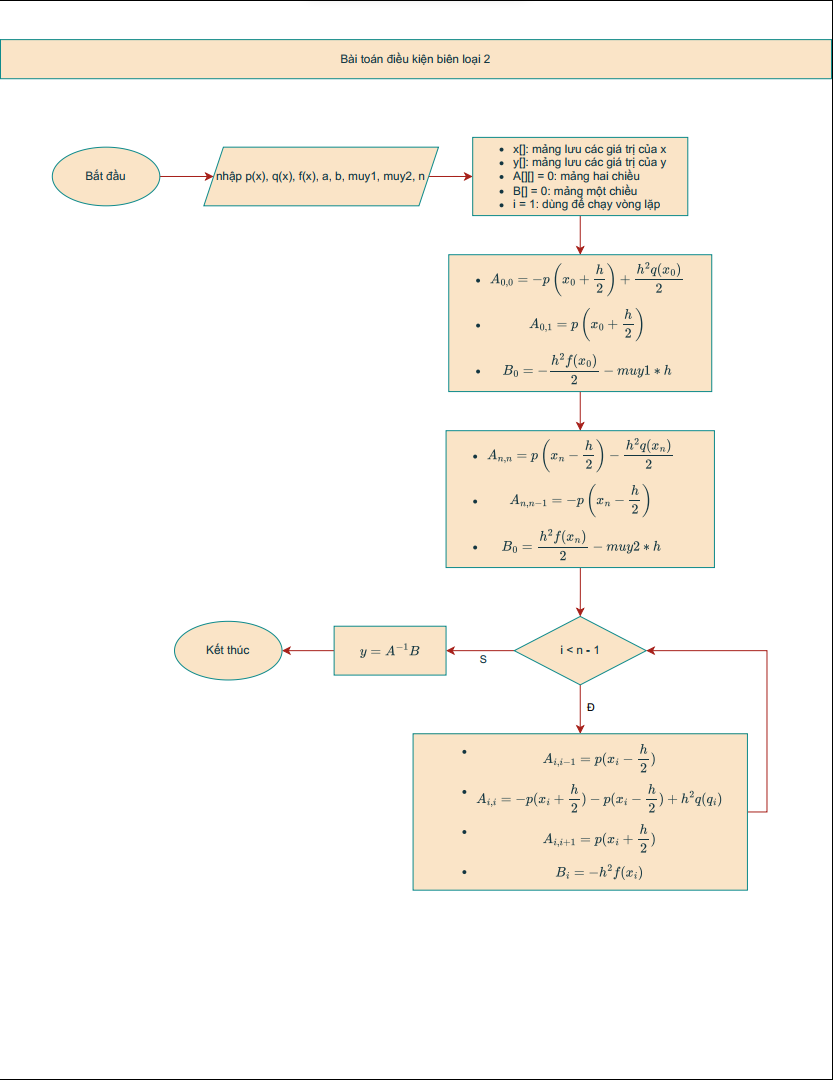\
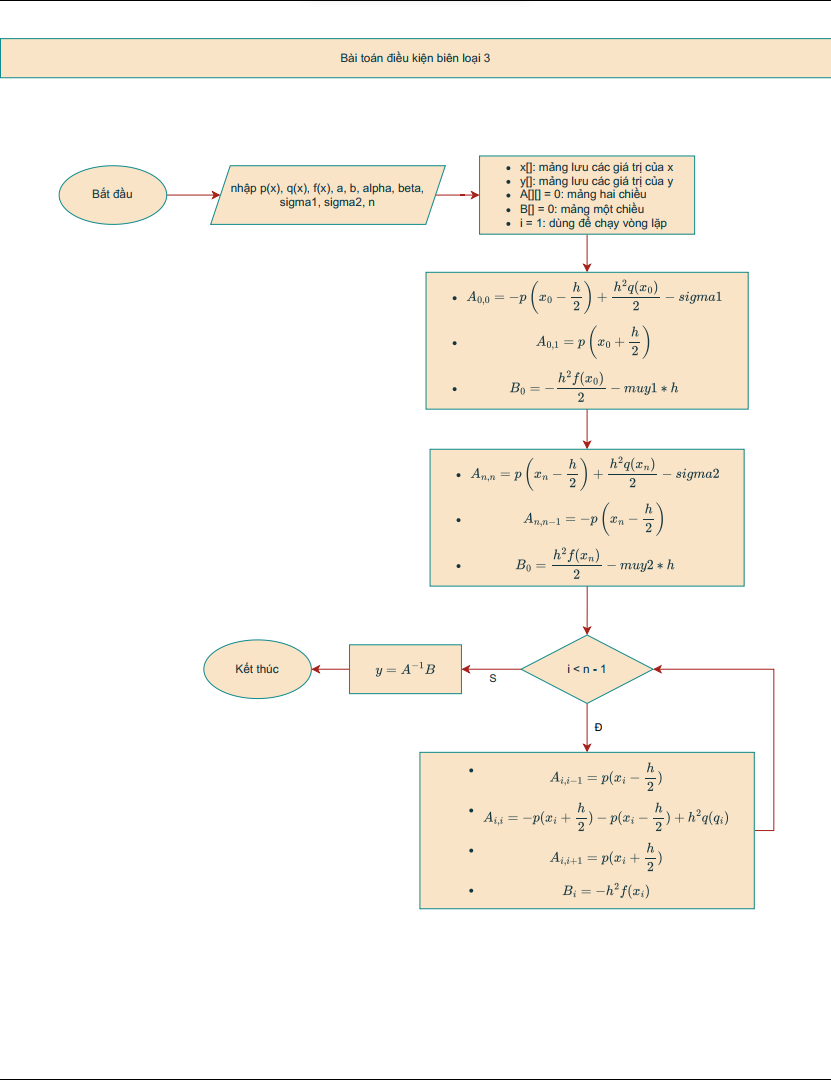\
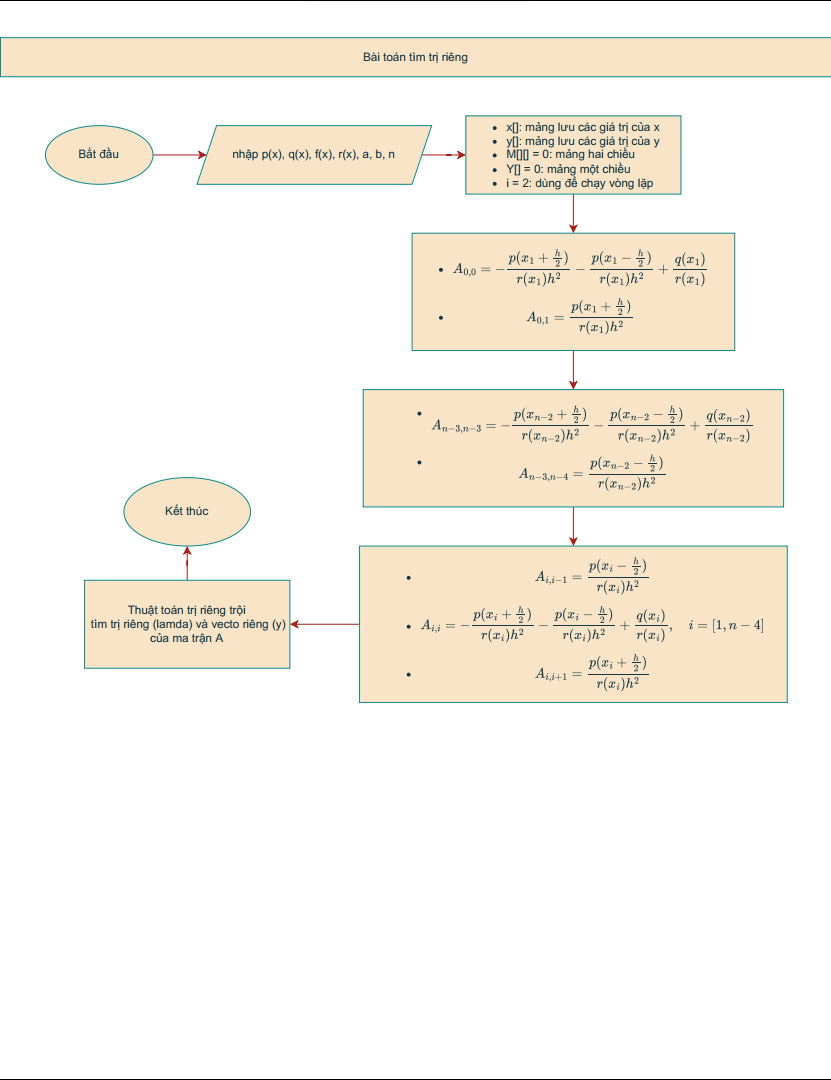